In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
jobs = pd.read_csv('fullsample.csv')

In [3]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395885 entries, 0 to 7395884
Data columns (total 12 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   JOBID      object
 1   STATE      object
 2   BEGIN      object
 3   END        object
 4   REQMEM     object
 5   USEDMEM    object
 6   REQTIME    object
 7   USEDTIME   object
 8   NODES      int64 
 9   CPUS       int64 
 10  PARTITION  object
 11  EXITCODE   object
dtypes: int64(2), object(10)
memory usage: 677.1+ MB


In [4]:
jobs.head()
pd.set_option("display.max_columns", None)

In [5]:
jobs ['STATE'] = jobs['STATE'].astype('str')

In [6]:
jobs['BEGIN']= pd.to_datetime(jobs['BEGIN'], errors ='coerce')

In [7]:
jobs['END']= pd.to_datetime(jobs['END'], errors ='coerce')

In [8]:
jobs['UNIT'] = jobs['REQMEM'].str.extract(r'(\D+)')


In [9]:
jobs['REQMEM'] = jobs['REQMEM'].str.extract(r'(\d+)')

In [10]:
jobs['USEDMEM'] = jobs['USEDMEM'].str.extract(r'(\d+)')

In [11]:
jobs['REQMEM'] = jobs['REQMEM'].astype('int')

In [12]:
# fullsample_df['REQTIME'] = fullsample_df['REQTIME'].str.extract(r'(\d+)')

In [13]:
jobs['REQTIME'] = jobs['REQTIME'].str.replace("-", " days ")
jobs['USEDTIME'] = jobs['USEDTIME'].str.replace("-", " days ")
jobs['REQTIME'] = pd.to_timedelta(jobs['REQTIME'])
jobs['USEDTIME'] = pd.to_timedelta(jobs['USEDTIME'])

In [14]:
for x in jobs.index:
    if ['UNIT'] == "Mn":
        jobs.iloc[x]['REQMEM']=jobs.iloc[x]['REQMEM']*jobs.iloc[x]['NODES']/jobs.iloc[x]['CPUS']

for t in jobs.index:
    if ['UNIT'] == "Mn":
        jobs.iloc[t]['USEDMEM']=jobs.iloc[t]['USEDMEM']*jobs.iloc[t]['NODES']/jobs.iloc[t]['CPUS']

In [15]:
jobs

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,UNIT
0,30616928,RUNNING,2021-07-31 22:15:00,NaT,2048,0,0 days 10:04:00,67 days 22:14:22,1,1,production,0:0,Mn
1,30853133,COMPLETED,2021-08-06 11:36:09,2021-09-05 11:36:32,262144,20604,30 days 00:00:00,30 days 00:00:23,1,1,cgw-platypus,0:0,Mn
2,30858137,COMPLETED,2021-08-06 19:04:39,2021-09-05 19:04:53,204800,57553,30 days 00:00:00,30 days 00:00:14,1,32,cgw-tbi01,0:0,Mn
3,30935078,COMPLETED,2021-08-09 16:52:51,2021-09-07 20:52:55,65536,20577,29 days 04:00:00,29 days 04:00:04,1,8,cgw-platypus,0:0,Mn
4,31364111_2,COMPLETED,2021-08-17 07:45:07,2021-09-10 16:45:24,16384,9733,24 days 09:00:00,24 days 09:00:17,1,1,production,0:0,Mn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395880,25493434,COMPLETED,2020-10-31 23:39:00,2020-10-31 23:40:46,2000,0,2 days 00:00:00,0 days 00:01:46,1,1,sam,0:0,Mn
7395881,25493435,COMPLETED,2020-10-31 23:39:13,2020-10-31 23:40:38,2000,187,2 days 00:00:00,0 days 00:01:25,1,1,sam,0:0,Mn
7395882,25493476,COMPLETED,2020-10-31 23:46:29,2020-10-31 23:49:43,4096,803,0 days 12:00:00,0 days 00:03:14,1,1,production,0:0,Mc
7395883,25493515,COMPLETED,2020-10-31 23:49:44,2020-10-31 23:51:40,2000,0,2 days 00:00:00,0 days 00:01:56,1,1,sam,0:0,Mn


In [16]:
jobs = jobs.dropna(subset=['END'])

In [17]:
jobs['BEGINHOUR'] = jobs['BEGIN'].dt.floor('H')
jobs['ENDHOUR'] = jobs['END'].dt.floor('H')

<ipython-input-17-84338b0d2193>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs['BEGINHOUR'] = jobs['BEGIN'].dt.floor('H')
<ipython-input-17-84338b0d2193>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs['ENDHOUR'] = jobs['END'].dt.floor('H')


In [18]:
completed = jobs[jobs.EXITCODE == '0:0']

In [19]:
jobs_count_per_hour = completed.groupby('ENDHOUR')['JOBID'].count()

In [20]:
jobs_count_per_hour2= jobs.groupby('ENDHOUR')['JOBID'].count()

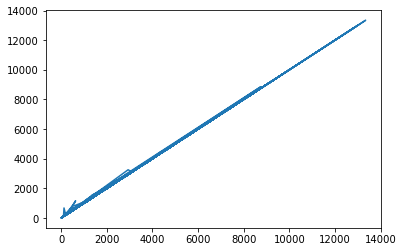

In [23]:
plt.plot(jobs)

In [ ]:
# slurm_wrapper_ce5 = pd.read_csv('slurm_wrapper_ce5.log',sep = ' - ', engine = 'python')